## Importing

In [74]:
import pandas as pd
import numpy as np
import  seaborn as sns
import datetime,warnings,scipy
import matplotlib.pyplot as plt

## Reading and analysing data

In [75]:
flight_info=pd.read_csv("flights.csv")

c:\Users\Tejinder Singh Virdi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
flight_info.head()
list(flight_info.columns)
#reduced_file=read_file.sample(n=100000, replace=True)

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [77]:
flight_info.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [78]:
airport=pd.read_csv("airports.csv")
airlines=pd.read_csv("airlines.csv")

In [79]:
flight_info.shape

(5819079, 31)

In [80]:
flight_info.describe

<bound method NDFrame.describe of          YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPOR

## Setting 0,1,2 based on amount of delay and plotting a graph 

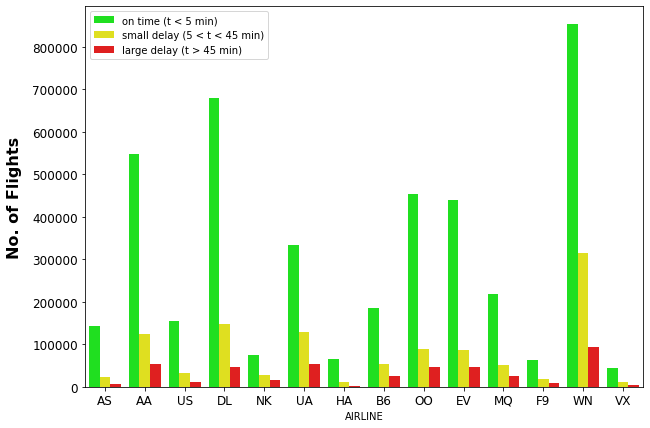

In [82]:
delay_type= lambda x:((0,1)[x>5],2)[x>45]
flight_info["DELAY_LEVEL"]=flight_info["DEPARTURE_DELAY"].apply(delay_type)

fig=plt.figure(1,(10,7))
ax=sns.countplot(x='AIRLINE',hue='DELAY_LEVEL',data=flight_info,palette=["#00FF00","#FFFF00","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(),fontsize=12,weight="normal")
plt.setp(ax.get_xticklabels(),fontsize=12,weight="normal")
#ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

## Cleaning the data

In [83]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [84]:
airport=airport.dropna(subset=['LATITUDE','LONGITUDE'])

In [85]:
flight_info.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
DELAY_LEVEL                  0
dtype: i

In [86]:
# calculating percentage of empty values in each column and removing the ones which have less percentage
flight_info.isnull().sum()*100/flight_info.shape[0]

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [87]:
flight_info1=flight_info.dropna(subset=["TAIL_NUMBER","DEPARTURE_TIME","DEPARTURE_DELAY","TAXI_OUT","WHEELS_OFF","SCHEDULED_TIME","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","ARRIVAL_DELAY"])

In [88]:
flight_info1.shape

(5714008, 32)

In [89]:
# creating a dataframe with all features that can cause delay
flightsinfo_modified = flight_info1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [90]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063439 entries, 27 to 5819071
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
 14  DELAY_LEVEL          1063439 non-null  int64  
dt

In [91]:
Flight_delays=flightsinfo_modified

In [92]:
#Dropping all contributing factors of delay to only focus on over all delay
flight_info2 = flight_info1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [93]:
flight_info2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
DELAY_LEVEL            0
dtype: int64

In [94]:
flight_info2.DEPARTURE_TIME.head

<bound method NDFrame.head of 0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5714008, dtype: float64>

In [95]:
#converting depature time which is a float to HH:MM format
def converttime(hours):
    if hours==2400:
        hours=0
    else:
        hours="{0:04d}".format(int(hours))
        Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
        return Hourmin
flight_info2["ACTUAL_DEPARTURE"]=flight_info1["DEPARTURE_TIME"].apply(converttime)


In [96]:
flight_info2["ACTUAL_DEPARTURE"]

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: ACTUAL_DEPARTURE, Length: 5714008, dtype: object

In [97]:
#converting year month to date time format
flight_info2['Date'] = pd.to_datetime(flight_info2[['YEAR','MONTH','DAY']])
flight_info2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: Date, Length: 5714008, dtype: datetime64[ns]

In [98]:
flight_info2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DELAY_LEVEL,ACTUAL_DEPARTURE,Date
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,404.0,4.0,430,408.0,-22.0,0,0,0,23:54:00,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,737.0,4.0,750,741.0,-9.0,0,0,0,00:02:00,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,800.0,11.0,806,811.0,5.0,0,0,0,00:18:00,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,748.0,8.0,805,756.0,-9.0,0,0,0,00:15:00,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,254.0,5.0,320,259.0,-21.0,0,0,0,00:24:00,2015-01-01


In [99]:
flight_info2['Day']=flight_info2['Date'].dt.weekday

In [100]:
flight_info2['Actual_Departure'] =flight_info1['DEPARTURE_TIME'].apply(converttime)
flight_info2['Scheduled_Arrival'] =flight_info1['SCHEDULED_ARRIVAL'].apply(converttime)
flight_info2['Scheduled_Departure'] =flight_info1['SCHEDULED_DEPARTURE'].apply(converttime)
flight_info2['Actual_Arrival'] =flight_info2['ARRIVAL_TIME'].apply(converttime)

In [101]:
flight_info2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,DELAY_LEVEL,ACTUAL_DEPARTURE,Date,Day,Actual_Departure,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0,23:54:00,2015-01-01,3,23:54:00,04:30:00,00:05:00,04:08:00
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,0,00:02:00,2015-01-01,3,00:02:00,07:50:00,00:10:00,07:41:00
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,00:18:00,2015-01-01,3,00:18:00,08:06:00,00:20:00,08:11:00
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,0,00:15:00,2015-01-01,3,00:15:00,08:05:00,00:20:00,07:56:00
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0,00:24:00,2015-01-01,3,00:24:00,03:20:00,00:25:00,02:59:00


In [102]:
flight_info2=flight_info2.merge(airlines,left_on='AIRLINE',right_on='IATA_CODE',how='inner')


In [104]:
flight_info2 = flight_info2.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flight_info2 = flight_info2.rename(columns={"AIRLINE_y":"AIRLINE"})

MemoryError: Unable to allocate 480. MiB for an array with shape (11, 5714008) and data type float64

In [105]:
flight_info2 = flight_info2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flight_info2 = flight_info2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

MemoryError: Unable to allocate 160. MiB for an array with shape (4, 5226569) and data type int64

In [31]:
flight_info2 = flight_info2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [32]:
flight_info2 = flight_info2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [33]:
data_vizual = pd.DataFrame(flight_info2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [34]:
data_vizual.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0


In [35]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [36]:
Flights=data_vizual
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0


## Plotting

In [37]:
Flights_correlation=Flights.drop(['AIRLINE','Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis=1)

In [38]:
corr_mat=Flights_correlation.corr()
corr_mat["ARRIVAL_DELAY"].sort_values(ascending=False)

ARRIVAL_DELAY      1.000000
DEPARTURE_DELAY    0.945139
TAXI_OUT           0.228186
TAXI_IN            0.117909
ELAPSED_TIME       0.030307
AIR_TIME          -0.006425
Day               -0.021223
DISTANCE          -0.024690
SCHEDULED_TIME    -0.029073
DIVERTED                NaN
Name: ARRIVAL_DELAY, dtype: float64

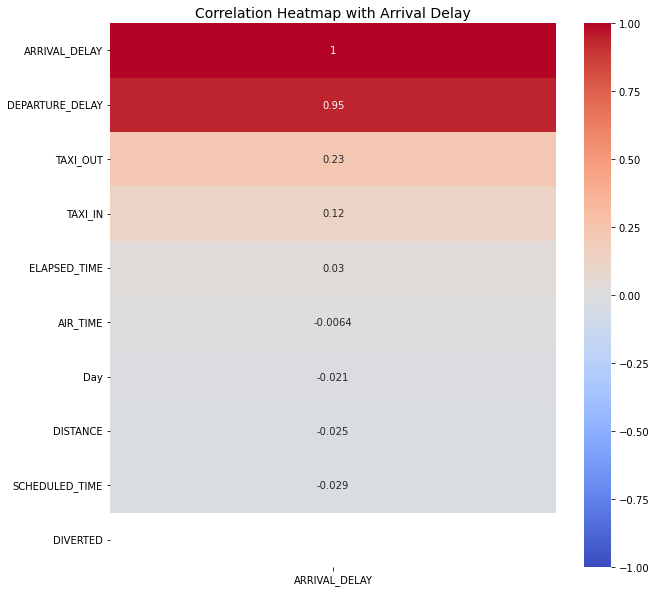

In [39]:
# Plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat[['ARRIVAL_DELAY']].sort_values(by=['ARRIVAL_DELAY'], ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Arrival Delay', fontsize=14)
plt.show()

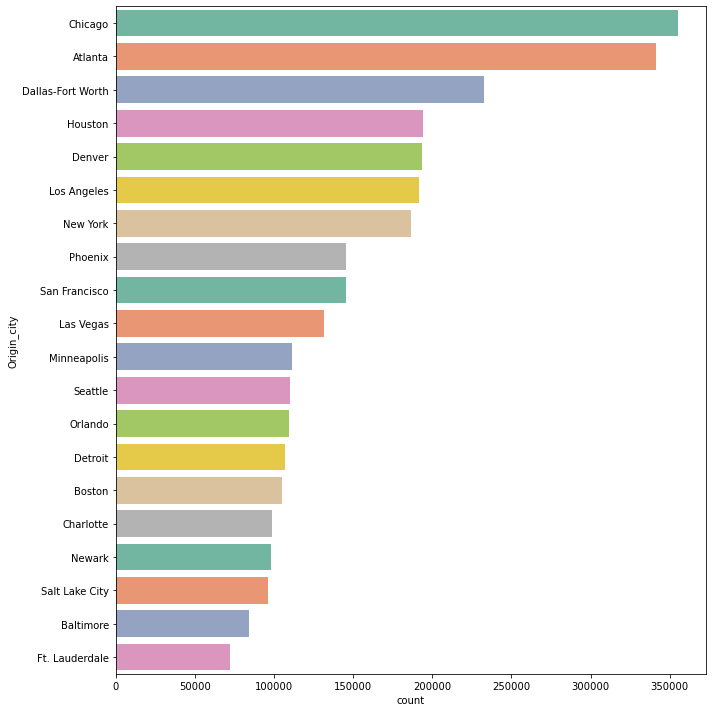

In [40]:
#visualisation of frequency of flights from top 20 cities

plt.figure(figsize=(10,10))
axis=sns.countplot(y=Flights['Origin_city'],data=Flights,order=Flights['Origin_city'].value_counts().iloc[:20].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()

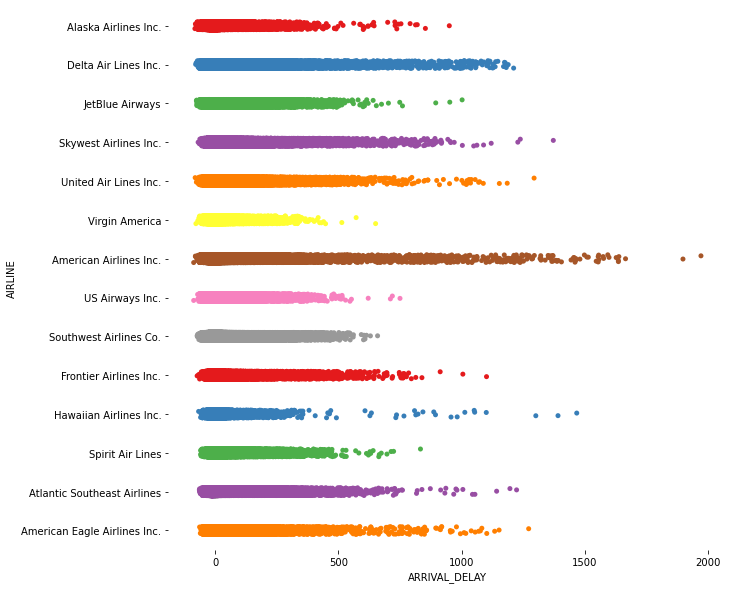

In [41]:
#visualisation of distribution of arrival delays of different airlines
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, palette="Set1")
plt.show()

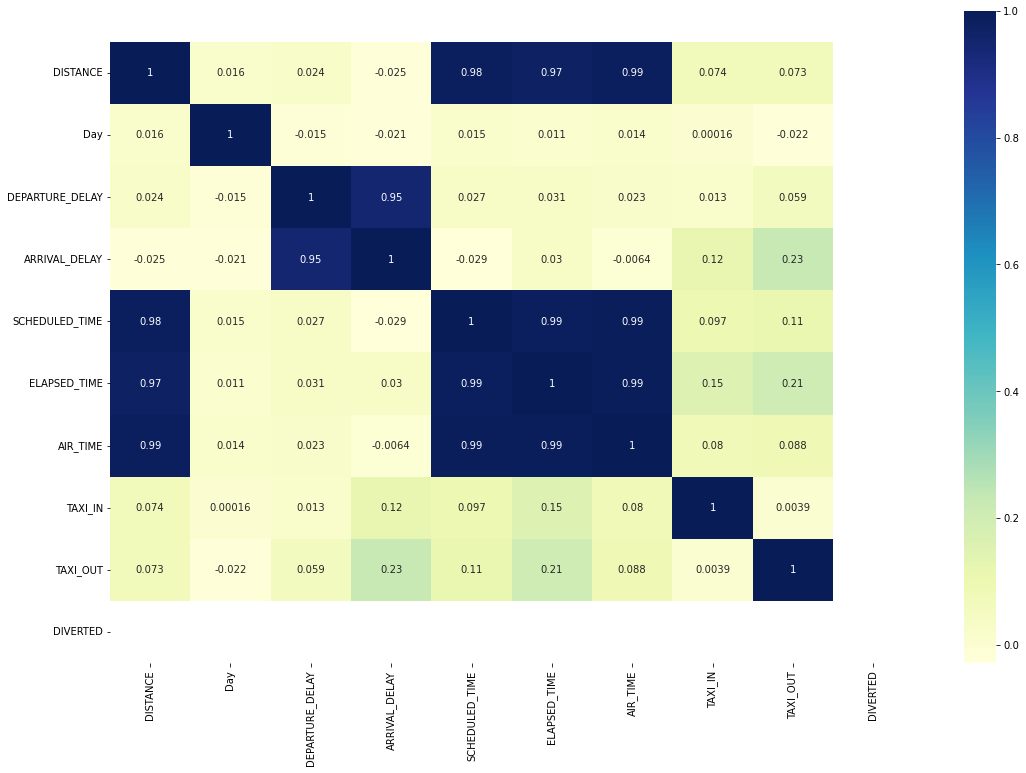

In [42]:
axis=plt.subplots(figsize=(18,12))
sns.heatmap(Flights.corr(),annot=True,cmap="YlGnBu")
b,t=plt.ylim()
t-=0.5
plt.ylim(b,t)
plt.show()

In [43]:
# Removing columns not needed to predict
Flights1=Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis=1)

In [44]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

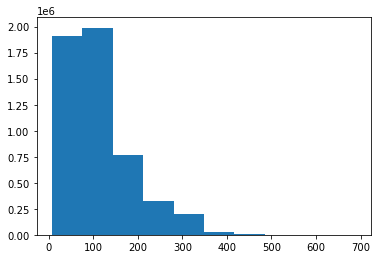

In [45]:
# Air Time distribution histogram
plt.hist(Flights1['AIR_TIME'])
plt.show()

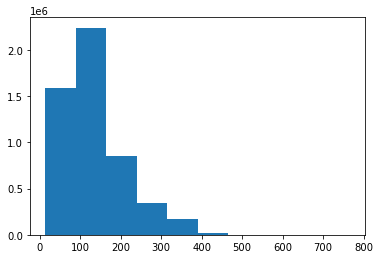

In [46]:
plt.hist(Flights1['ELAPSED_TIME'])
plt.show()


## PREDICTION

## Regression

In [47]:
# Importing this will help to standardize variable( zero mean and unit variance)
from sklearn.preprocessing import StandardScaler
# helps in splitting the data into test and train
from sklearn.model_selection import train_test_split
# Helps in converting categorical data into numerical value
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
le=LabelEncoder()
Flights1.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,Day,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,ANC,SEA,1448,23:54:00,2015-01-01,3,00:05:00,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,ANC,SEA,1448,00:41:00,2015-01-01,3,00:45:00,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,ANC,SEA,1448,01:40:00,2015-01-01,3,01:55:00,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,ANC,SEA,1448,02:09:00,2015-01-01,3,02:20:00,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,ANC,SEA,1448,04:57:00,2015-01-01,3,05:05:00,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0


In [57]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

In [58]:
Flights1.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,17,275,1448,3,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,0,17,275,1448,3,-4.0,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,0,17,275,1448,3,-15.0,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,0,17,275,1448,3,-11.0,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,0,17,275,1448,3,-8.0,-14.0,205.0,199.0,179.0,4.0,16.0,0


In [59]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

KeyError: "['Scheduled_Departure' 'Scheduled_Arrival' 'Actual_Arrival' 'Date'\n 'Actual_Departure'] not found in axis"

In [60]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'Day',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

In [61]:
#creating the dataset to train without the target variable that is 'ARRIVAL DELAY'
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5219244, 12)

In [62]:
#creating the column with only the target variable
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [64]:
#Applying Standard Scalar
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr=LinearRegression()

fitResult = lr.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)

#predicting metrics to measure performance of linear regression
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 1.5327894319176897e-06
MSE: 3.0655780798897134e-06
RMSE: 0.001750879230526684
R2: 0.9999999980588673


In [66]:
print(y_pred)
y_pred.shape

[-21.  15. -14. ...  25. -14.  44.]


(1304811,)

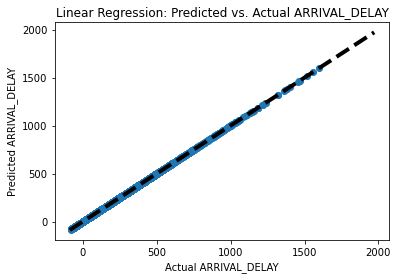

In [67]:
# Create a scatter plot of the predicted vs. actual values
fig,ax=plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel("Actual ARRIVAL_DELAY")
plt.ylabel("Predicted ARRIVAL_DELAY")
plt.title("Linear Regression: Predicted vs. Actual ARRIVAL_DELAY")
plt.show()

## Random Forest Generator

In [68]:
from sklearn.ensemble import RandomForestRegressor
Rfc = RandomForestRegressor(random_state=2)

fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

KeyboardInterrupt: 

In [70]:
#Boosted Linear Regression
from sklearn.ensemble import AdaBoostRegressor
LinR = LinearRegression()
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)

fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 1.5327893376013673e-06
MSE: 3.065578079891249e-06
RMSE: 0.0017508792305271227
R2: 0.9999999980588673


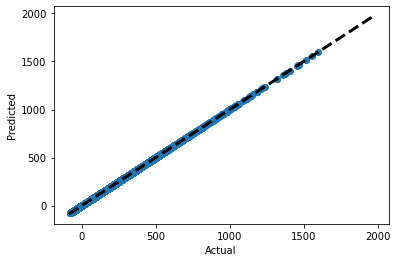

In [71]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Boosted Linear Regression: Predicted vs. Actual ARRIVAL_DELAY")
plt.show() 

In [72]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 0.9485381407728782
MSE: 8.560051225809715
RMSE: 2.925756521963117
R2: 0.9945797512413117


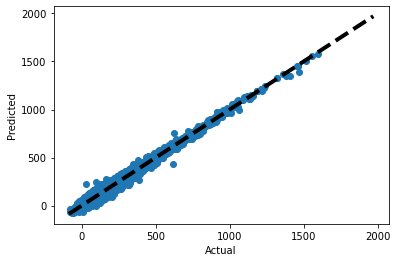

In [73]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Decision Tree: Predicted vs. Actual ARRIVAL_DELAY")
plt.show() 